In [3]:
import cv2
import numpy as np
import glob
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir('..')
from constant import PATHS
import pandas as pd

In [2]:
df = pd.read_csv(PATHS.TRAIN_CSV)

In [3]:
file_names = df.iloc[:,0]
labels = df.iloc[:,1]

In [4]:
file_names[-20:-1]

2816     1616727980.722156.2.jpg
2817     1616727980.880926.2.jpg
2818    1616727981.1039112.2.jpg
2819    1616727986.8227196.3.jpg
2820     1616727987.267602.3.jpg
2821    1616727987.4214597.3.jpg
2822    1616727987.8278272.3.jpg
2823    1616727988.3286438.3.jpg
2824    1616727988.4495623.3.jpg
2825    1616727988.5717926.3.jpg
2826    1616727988.6929166.3.jpg
2827    1616727988.8137097.3.jpg
2828    1616727989.3738391.2.jpg
2829    1616727989.6798525.2.jpg
2830    1616728000.9237888.0.jpg
2831    1616728001.1159437.0.jpg
2832    1616728005.6668475.1.jpg
2833    1616728006.3420093.1.jpg
2834     1616728006.914113.0.jpg
Name: 1616659547.2334673.0.jpg, dtype: object

In [5]:
labels[-20:-1]

2816    2
2817    2
2818    2
2819    3
2820    3
2821    3
2822    3
2823    3
2824    3
2825    3
2826    3
2827    3
2828    2
2829    2
2830    0
2831    0
2832    1
2833    1
2834    0
Name: 0, dtype: int64

In [6]:
dim = 240*320
X = np.empty((0,dim))
y = np.empty((0, 4))
for file_name in file_names:
    file_path = os.path.join(PATHS.IMAGES, file_name)
    image = cv2.imread(file_path)
    print(file_path)
    if image is None:
        raise Exception('Image not found') 
    image = np.mean(image,axis=-1)
    image = image.reshape(dim,)
    X = np.vstack((X, image))
y = labels.to_numpy()
shape = (y.size, 4)

one_hot = np.zeros(shape)
rows = np.arange(y.size)
one_hot[rows, y] = 1
y = one_hot

.3.jpg
data/images/1616727322.0414681.3.jpg
data/images/1616727322.2424664.3.jpg
data/images/1616727322.7426255.3.jpg
data/images/1616727322.8629723.3.jpg
data/images/1616727322.9833462.3.jpg
data/images/1616727323.4900007.3.jpg
data/images/1616727324.2914245.0.jpg
data/images/1616727324.5833151.3.jpg
data/images/1616727325.0837216.3.jpg
data/images/1616727325.2042904.3.jpg
data/images/1616727325.945552.0.jpg
data/images/1616727326.288257.3.jpg
data/images/1616727326.6992815.3.jpg
data/images/1616727327.2887013.0.jpg
data/images/1616727327.8101568.0.jpg
data/images/1616727328.2933638.0.jpg
data/images/1616727328.7722569.0.jpg
data/images/1616727329.1993475.2.jpg
data/images/1616727329.7792344.0.jpg
data/images/1616727330.0715375.2.jpg
data/images/1616727330.4305315.0.jpg
data/images/1616727330.7601788.0.jpg
data/images/1616727331.2607777.0.jpg
data/images/1616727331.380328.0.jpg
data/images/1616727331.7394075.3.jpg
data/images/1616727332.1384084.0.jpg
data/images/1616727332.6388793.0.j

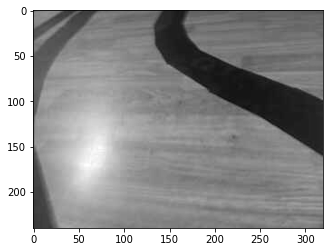

In [7]:
plt.imshow(X[0].reshape(240,320), cmap='gray')

In [6]:
X.shape

(11, 76800)

In [7]:
y

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [8]:
model = cv2.ml.ANN_MLP_create()
layer_sizes = np.int32([dim, 32, 4])
model.setLayerSizes(layer_sizes)
model.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
model.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 2, 1)
model.setTermCriteria((cv2.TERM_CRITERIA_COUNT, 20, 0.01))

In [9]:
model.train(np.float32(X), cv2.ml.ROW_SAMPLE, np.float32(y))

True

In [10]:
ret, resp = model.predict(X)
prediction = resp.argmax(-1)
true_labels = y.argmax(-1)
train_rate = np.mean(prediction == true_labels)
print (len(prediction))
print (prediction)
print ('Train accuracy: ', "{0:.2f}%".format(train_rate * 100))

2836
[1 0 0 ... 1 1 1]
Train accuracy:  61.78%


In [9]:
true_labels

array([2, 0, 0, 2, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 3, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 3, 0,
       0, 2, 0, 0, 2, 0, 3, 3, 2, 0, 3, 3, 3, 3, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 3, 0,
       3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 3, 3, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 0, 3, 0, 0,
       3, 3, 3, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 3,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 3,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 3,
       3, 0, 0, 3, 3, 3, 3, 3, 0, 2, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3,
       3, 2, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0,

In [16]:
prediction

array([3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1])

In [1]:
model.save(PATHS.MODEL)
model = cv2.ml.ANN_MLP_load(PATHS.MODEL)

NameError: name 'model' is not defined

In [4]:
model = cv2.ml.ANN_MLP_load(PATHS.MODEL)

error: OpenCV(4.5.1) /tmp/pip-req-build-7m_g9lbm/opencv/modules/ml/src/ann_mlp.cpp:1525: error: (-215:Assertion failed) fs.isOpened() in function 'load'
